In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nba_api
import seaborn as sns

In [12]:
play_types = [
    "isolation",
    "cut",
    "off_screen",
    "PnR_handler",
    "PnR_roller",
    "post_up",
    "spot_up"
]

In [13]:
output = {}
for play in play_types:
    output[play] = pd.read_csv("Results/" + play + "_labels.csv")

In [14]:
height_weight_data = pd.read_csv("Data/PlayerMeasurements/height_weight.csv")
height_weight_data.drop(height_weight_data.columns.difference(['PLAYER','HEIGHT', "WEIGHT"]), axis=1, inplace=True)

In [15]:
#Join dataframes
for play in play_types:
    output[play] = output[play].merge(height_weight_data, how='left', on="PLAYER")

In [18]:
"""
Isolation clusters
"""

'\nIsolation clusters\n'

In [50]:
play="cut"
print(output[play][output[play]["LABEL"] == 2]["PLAYER"])

11    Giannis Antetokounmpo
12               Obi Toppin
14        Jonas Valanciunas
19           Onyeka Okongwu
20             Zach Collins
21             Goga Bitadze
26             Kevin Durant
31            Chet Holmgren
32          Lauri Markkanen
33       Kristaps Porzingis
43          De'Andre Hunter
46           Keldon Johnson
47        Mitchell Robinson
Name: PLAYER, dtype: object


78.15151515151516
218.36363636363637
77.20454545454545
207.54545454545453
78.79411764705883
215.91176470588235


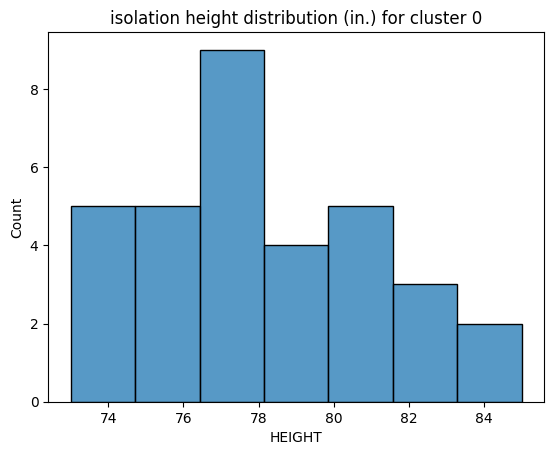

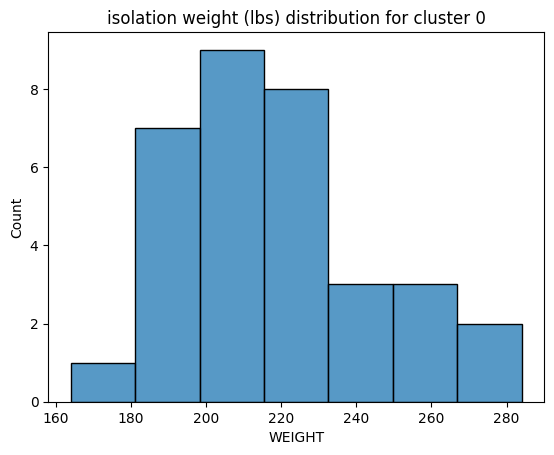

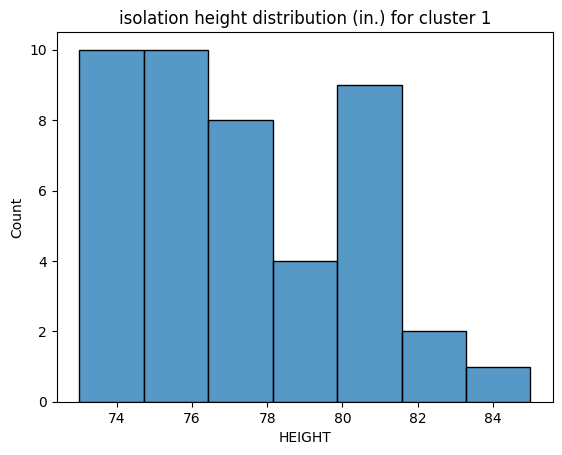

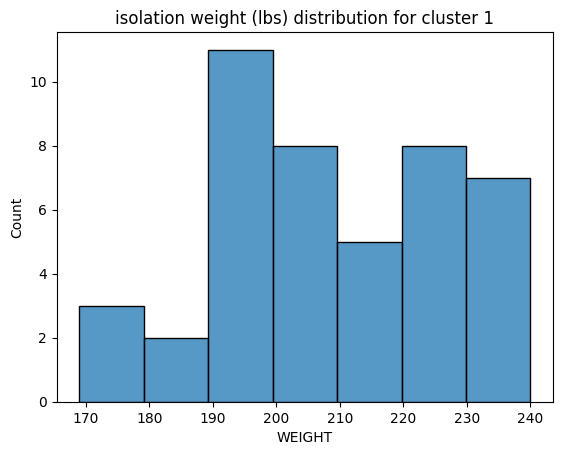

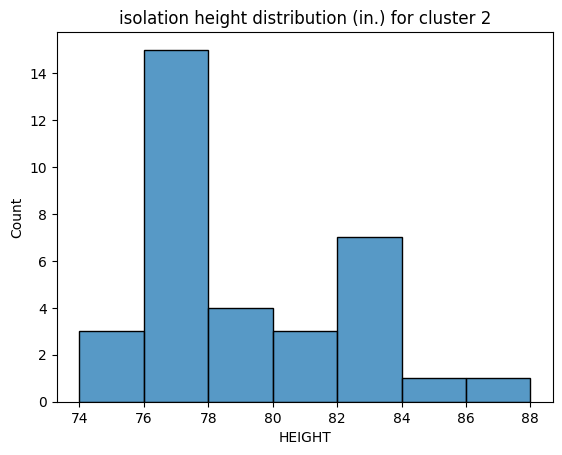

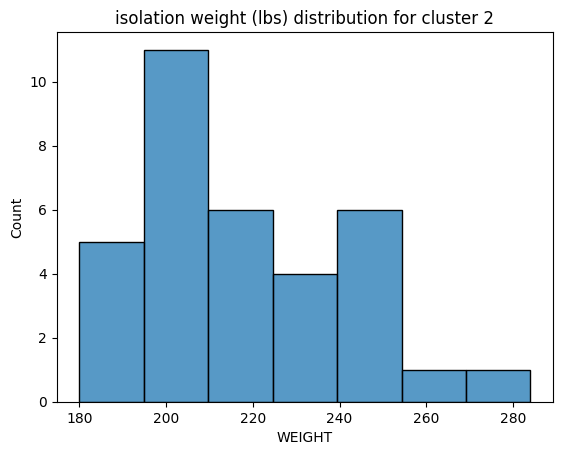

In [41]:
play="isolation"
for cluster in range(len(pd.unique(output[play]["LABEL"]))):
    plt.figure()
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["HEIGHT"]))
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="HEIGHT").set(title=(play + " height distribution (in.) for cluster " + str(cluster)))
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["WEIGHT"]))
    plt.figure()
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="WEIGHT").set(title=(play + " weight (lbs) distribution for cluster " + str(cluster)))


81.61904761904762
240.57142857142858
83.0625
243.375
82.6923076923077
235.69230769230768


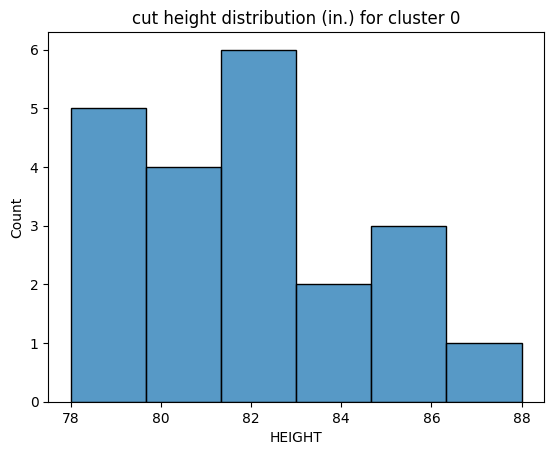

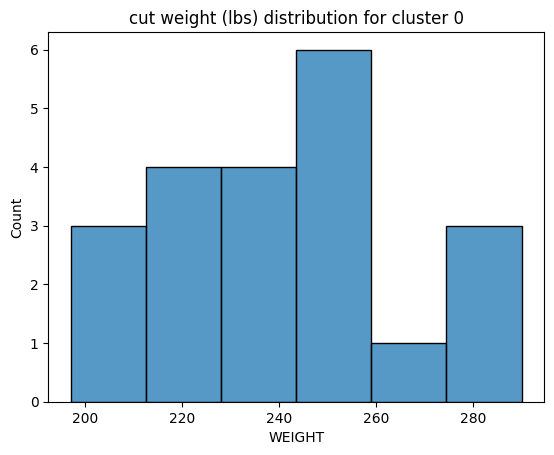

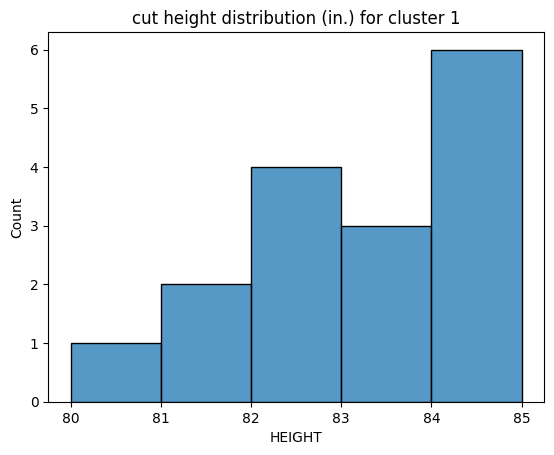

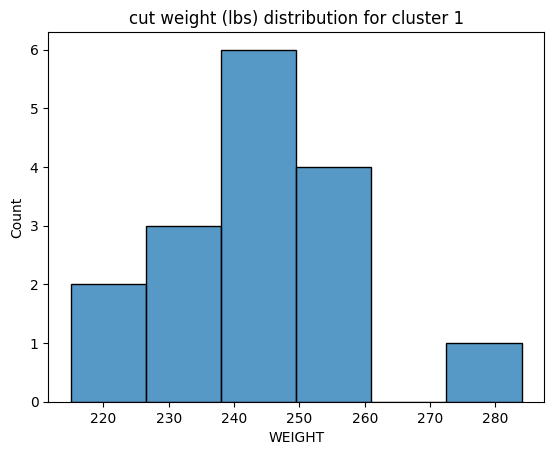

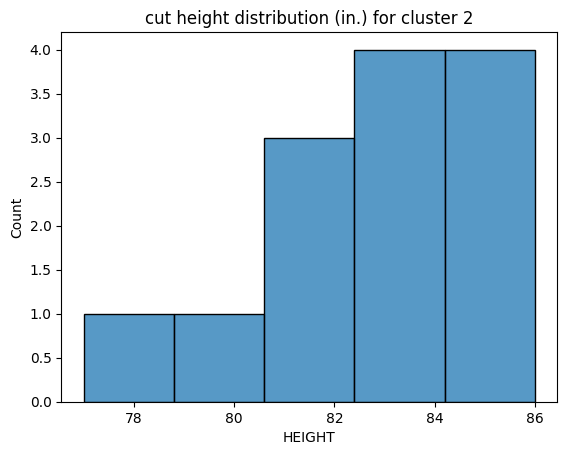

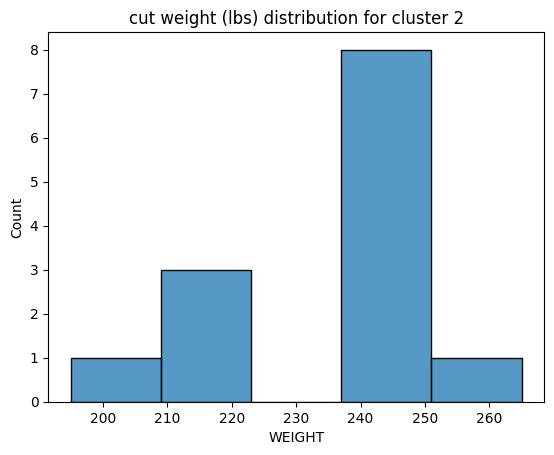

In [44]:
play="cut"
for cluster in range(len(pd.unique(output[play]["LABEL"]))):
    plt.figure()
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["HEIGHT"]))
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="HEIGHT").set(title=(play + " height distribution (in.) for cluster " + str(cluster)))
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["WEIGHT"]))
    plt.figure()
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="WEIGHT").set(title=(play + " weight (lbs) distribution for cluster " + str(cluster)))
